<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab09_Matrices_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matrices

1. **Modelo de encriptación**

Un proceso para encriptar un mensaje secreto es usar cierta matrix cuadrada cuyos elementos son enteros con elementos enteros en la inversa. Se recibe un mensaje, se asigna un número a cada letra Por ejemplo, A=1, B=2, C=3, ... etc y espacio=27), se arreglan los números en una matriz de izquierda a derecha en cada fila, donde el número de elementos en la fila es igual al tamaño de la matriz de código, se multiplica esa matriz por la matriz de código por la derecha, se transcribe el mensaje en una cadena de números y se manda el mensaje.

La persona que debe recibir el mensaje conoce la matriz de código. El o ella arrglan el mensaje encriptado en una matriz de izquierda a derecha en cada fila, en donde el número de elementos en una fila conicide con el tamaño de la matriz de código multiplicada por la derecha, por el inverso de la matriz de código y puede leer mensaje decodificado.

Usted a recibido el siguiente mensaje que fue encriptado usando la matriz A. Decodifiquelo.

```
matrix([[ 1,  2, -3,  4,  5],
        [-2, -5,  8, -8, -9],
        [ 1,  2, -2,  7,  9],
        [ 1,  1,  0,  6, 12],
        [ 2,  4, -6,  8, 11]])
```

Mensaje

47,49,-19,257,487,10,-9,63,137,236, 79,142,-184,372,536,59,70,-40,332,588,

la primera fila del mensaje es 47,49,-19,257,487

¿Cual es el mensaje?



In [1]:
import numpy as np
from scipy import linalg
import sympy as sp
import matplotlib.pyplot as plt


In [2]:
codigo = np.array([[ 1,  2, -3,  4,  5],
        [-2, -5,  8, -8, -9],
        [ 1,  2, -2,  7,  9],
        [ 1,  1,  0,  6, 12],
        [ 2,  4, -6,  8, 11]])



mensaje = np.array([[47,49,-19,257,487],
                    [10,-9,63,137,236],
                    [79,142,-184,372,536],
                    [59,70,-40,332,588],

                    ])

In [3]:

inv_codigo = np.linalg.inv(codigo)

deco = np.matmul(mensaje,inv_codigo)

dic = {1:"A",2:"B",3:"C",4:"D",5:"E",6:"F",
       7:"G",8:"H",9:"I",10:"J",11:"K",12:"L",13:"M",14:"N",15:"O",16:"P",17:"Q",
       18:"R",19:"S",20:"T",21:"U",22:"V",23:"W",24:"X",25:"Y",26:"Z",27:" "}

In [4]:

msg = ""

for i in range(np.shape(deco)[0]):
  for j in range(np.shape(deco)[1]):
    val = round(float(deco[i,j]),0)
    msg = msg + dic[val]
msg

'ARE YOU HAVING FUN  '

2. Operaciones matricial con regresión lineal.

Cuando se desea hacer una regresión lineal multivariada, existen diferentes formas de realizar la regresión, una de ellas es encontrar el error cuadrático medio y miniminzar el conjunto de parámetros de la regresión emplando algún metodo de minimización, otra forma es encontrar la expresión analítica en forma matricial, para determinar el conjunto de parámetros de la regresión. En este último caso, la regresión lineal viene dada por la siguiente expresion generalizada:


- $\Theta = (X^T X)^{-1} X^T y$

donte $\Theta$ es la matriz de parametros asociados a la regresión lineal, X la matriz de características y $y$ los valos esperados, así, si tenemos una conjunto de datos en N dimensiones; la recta, plano o hyperplano puede ser calculado como:

$Y=\Theta^T X$


En el caso de dos dimensiones, supongamos que X, y Y presentan un comportamiento lineal, y vienen dados por ( En este caso el super indice es :


- Sea $\vec{X}=x^{(1)}, x^{(2)}, x^{(3)}, x^{(4)}, ..., x^{(m)}$
- Sea $\vec{Y}=y^{(1)}, y^{(2)}, y^{(3)}, y^{(4)}, ..., y^{(m)}$

Para determinar la ecuación de la recta, hay que conocer los párametros $\theta_0 $, $\theta_1$, que cumplen que :   $y^{(i)} = \theta_1 x^{(i)} + \theta_0$ la anterior expresión puede ser escrita como:

\begin{equation}
\begin{bmatrix}
y^{(1)}\\
y^{(2)}\\
\vdots\\
y^{(m)}\\
\end{bmatrix}=
\begin{bmatrix}
\theta_0 & \theta_1 \\
\end{bmatrix}
\begin{bmatrix}
1 & 1 & \cdots & 1 \\
x_1^{(1)} & x_1^{(2)} & \cdots & x_1^{(m)} \\
\end{bmatrix}
\end{equation}


Para determinar la matriz de theta entonces se puede aplicar la ecuación:

- $\Theta = (X^T X)^{-1} X^T y$

donde:
\begin{equation}
X=
\begin{bmatrix}
1 & x_1^{(1)} \\
1 & x_1^{(2)} \\
\vdots & \vdots \\
1 & x_1^{(m)}
\end{bmatrix}
\end{equation}

y


\begin{equation}
y=
\begin{bmatrix}
y^{(1)} \\
y^{(2)} \\
\vdots\\
y^{(m)}
\end{bmatrix}
\end{equation}

Su tarea será construir un programa que realice la regresión lineal para los siguientes puntos:
```python
N = 10
x1 = np.linspace(0, 10, N)
noise=2*np.random.random(N)-1
y = 0.9*x1 + noise
```



Generalice para el siguiente problema bidimensional:


```python
N = 10
x1 = np.linspace(-1, 1, N)
x2 = np.linspace(-2, 2, N)
noise1=2*np.random.random(N)-1
noise2=2*np.random.random(N)-1
y = 2*(x1+noise1) - 3*(x2+noise2) + 0.0 #+ 4*np.random.random(100)

N = 10
X1, X2 = np.meshgrid(x1,x2)
Y = 2*X1 - 3*X2 + 0.0
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X1, X2, Y)
#scatter = ax.scatter(x1, x2, y,"-")
```


In [5]:
## Condiciones iniciales.

N = 10
x1 = np.linspace(0, 10, N)
x3 = np.linspace(0,10,200)

noise = 2*np.random.random(N)-1
y = 0.9*x1 + noise

x2 = np.empty((len(x1),2))

y2 = np.empty((len(y),1))
y


x1

array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
        5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ])

In [6]:
## construyendo el vector x y el vector y
for i in range(np.shape(x2)[0]):
  y2[i] = y[i]
  for j in range(np.shape(x2)[1]):
    if j == 0:
      x2[i,j] = 1
    if j == 1:
      x2[i,j] = x1[i]

x2 = np.asmatrix(x2)
y2 = np.asmatrix(y2)


x2,y2


(matrix([[ 1.        ,  0.        ],
         [ 1.        ,  1.11111111],
         [ 1.        ,  2.22222222],
         [ 1.        ,  3.33333333],
         [ 1.        ,  4.44444444],
         [ 1.        ,  5.55555556],
         [ 1.        ,  6.66666667],
         [ 1.        ,  7.77777778],
         [ 1.        ,  8.88888889],
         [ 1.        , 10.        ]]),
 matrix([[0.5529202 ],
         [0.82531726],
         [2.46499285],
         [2.26985449],
         [3.82204079],
         [5.51223098],
         [5.56178959],
         [6.08395452],
         [8.29519055],
         [9.98520435]]))

In [7]:
## transpuesta de la matriz

x2_T = x2.T

x2_T,x2

T1 = x2_T@x2

T1 = T1.I


constantes = np.array([T1@x2_T@y2])

f = lambda x,a,b :  a*x + b


Text(0.5, 1.0, 'Regresión lineal')

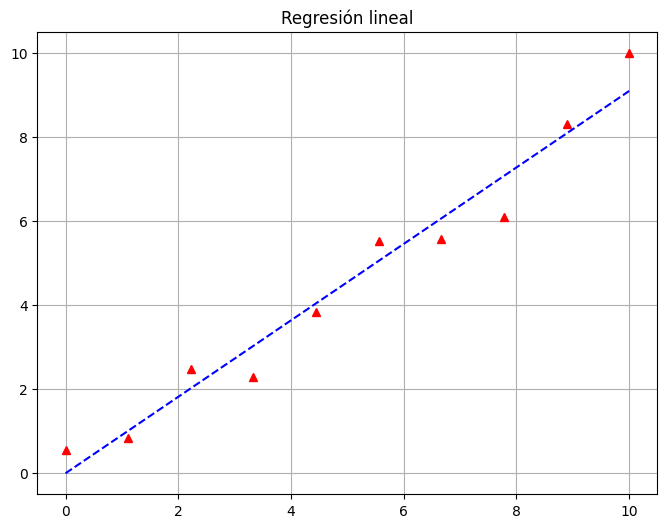

In [8]:
plt.figure(figsize = (8,6))
plt.grid(True)
plt.plot(x1,y,"^", color = "red")
plt.plot(x3,f(x3,constantes[0][1],constantes[0][0]), color = "blue", ls = "--")
plt.title("Regresión lineal")

array([ 6.97940217,  5.60973995,  7.41882395,  0.92852926,  0.15563301,
        0.94550968, -1.42782467, -4.11442117, -3.72617994, -5.99447112])

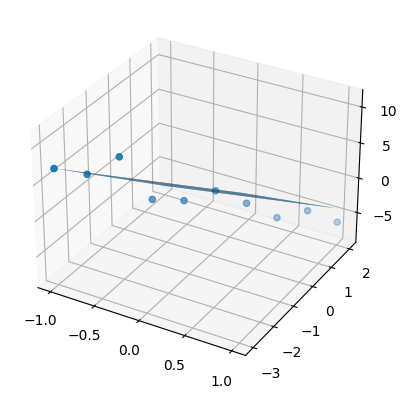

In [30]:
N = 10
x1 = np.linspace(-1, 1, N)
x2 = np.linspace(-3, 2, N)
noise1=2*np.random.random(N)-1
noise2=2*np.random.random(N)-1
y = 2*(x1+noise1) - 3*(x2+noise2) + 0.0 #+ 4*np.random.random(100)

N = 10
X1, X2 = np.meshgrid(x1,x2)
Y = 2*X1 - 3*X2 + 0.0
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X1, X2, Y)
scatter = ax.scatter(x1, x2, y,"-")


y


In [39]:
## construcción de la matriz X_.
colX1 = np.shape(x1)[0]

X_ = np.zeros((colX1,3))

for i in range(colX1):
  for j in range(3):
    if j == 0:
      X_[i,j] = 1
    elif j == 1:
      X_[i,j] = x1[i]
    elif j == 2:
      X_[i,j] = x2[i]
## construcción del vector y_

y_ = np.zeros((colX1,1))

for i in range(len(x1)):
  y_[i,0] = y[i]
y_

y_ = np.asmatrix(y_)

sp.Matrix(X_),sp.Matrix(y_)

(Matrix([
 [1.0,               -1.0,               -3.0],
 [1.0, -0.777777777777778,  -2.44444444444444],
 [1.0, -0.555555555555556,  -1.88888888888889],
 [1.0, -0.333333333333333,  -1.33333333333333],
 [1.0, -0.111111111111111, -0.777777777777778],
 [1.0,  0.111111111111111, -0.222222222222222],
 [1.0,  0.333333333333333,  0.333333333333333],
 [1.0,  0.555555555555555,  0.888888888888889],
 [1.0,  0.777777777777778,   1.44444444444444],
 [1.0,                1.0,                2.0]]),
 Matrix([
 [ 6.97940216858479],
 [ 5.60973995385444],
 [ 7.41882395443002],
 [0.928529261083936],
 [0.155633008782868],
 [0.945509680300255],
 [-1.42782466994352],
 [-4.11442117430453],
 [-3.72617994135635],
 [-5.99447112495149]]))

In [41]:
## traspuesta de la matriz X_
X_T = np.transpose(X_)


## Multiplicación por la matriz original

mult = np.matmul(X_T,X_)



## Inversa de la multiplicación anterior

mult_inv = np.linalg.inv(mult)

mult_inv = np.asmatrix(mult_inv)

## solución de la linealización

sol = mult_inv@X_T@y_

sol = np.array(sol)

## La ecuación resultante es de la forma. Y = C+AX+By.

## Entonces, las constantes C,A y B son:

print(f"C:{sol[0]},A:{sol[1]},B:{sol[2]}")


C:[0.49524648],A:[-10.47862261],B:[0.16397781]
